In [1]:
# Module importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Daten in Pandas df laden
data = pd.read_excel("llr_pseudo_log_data.xlsx")
data.head(3)

,Einkommen,Rauchen
0,2000,Nein
1,2500,Nein
2,2000,Nein


In [3]:
# Datawrangling
data["Rauchen"] = data["Rauchen"].map({"Nein":0, "Ja":1})

In [4]:
# Datawrangling check
data.head(3)

,Einkommen,Rauchen
0,2000,0
1,2500,0
2,2000,0


In [16]:
# x und y Achse definieren und in geeigneter Form bringen
x = data["Einkommen"].astype(int).values.reshape(-1,1)
y = data["Rauchen"].astype(float).values

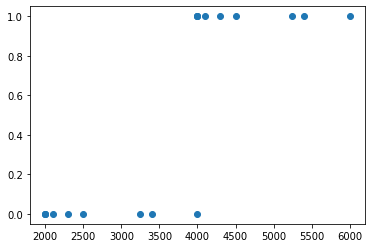

In [17]:
# Einfacher Scatter plot
plt.scatter(x, y)
plt.show()

In [7]:
# Trainingsdaten und Testdaten erstellen
train, test = train_test_split(data, test_size = 0.2)

In [8]:
# Trainingsdaten
train

,Einkommen,Rauchen
3,3400,0
2,2000,0
17,5240,1
16,4000,1
14,4300,1
6,4000,0
8,3240,0
13,4100,1
1,2500,0
12,5400,1


In [9]:
# Testdaten
test

,Einkommen,Rauchen
15,6000,1
10,4500,1
0,2000,0
7,2000,0


In [10]:
# Traingsdaten und Testdaten in passende Dateform umwandeln

## Trainingsdaten
x_train = train["Einkommen"].values.reshape(-1,1)
y_train = train["Rauchen"].values

## Testdaten
x_test = test["Einkommen"].values.reshape(-1,1)
y_test = test["Rauchen"].values.reshape(-1,1)


In [11]:
# Logistische Regression aufgrund Trainingsdaten erstellen
model = LogisticRegression().fit(x_train, y_train)

In [12]:
# Konfusionsmatrix erstellen
y_predict_test = model.predict(y_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_predict_test)
print(cnf_matrix)

[[2 0]
 [2 0]]


In [13]:
# x_values generieren fuer das Model, zum plotten
x_values = np.linspace(1000,7000,100).reshape(-1,1)
y_predict_values = model.predict_proba(x_values)

# 1 Spalte = Wahrscheinlichkeit, dass Person nicht Raucht.
# 2 Spalte = Wahrscheinlichkeit, dass Person Raucht.

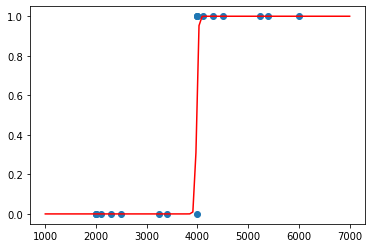

In [14]:
# Grafiken plotten
plt.scatter(x,y)
plt.plot(x_values, y_predict_values[:,1], c = "r")
plt.show()